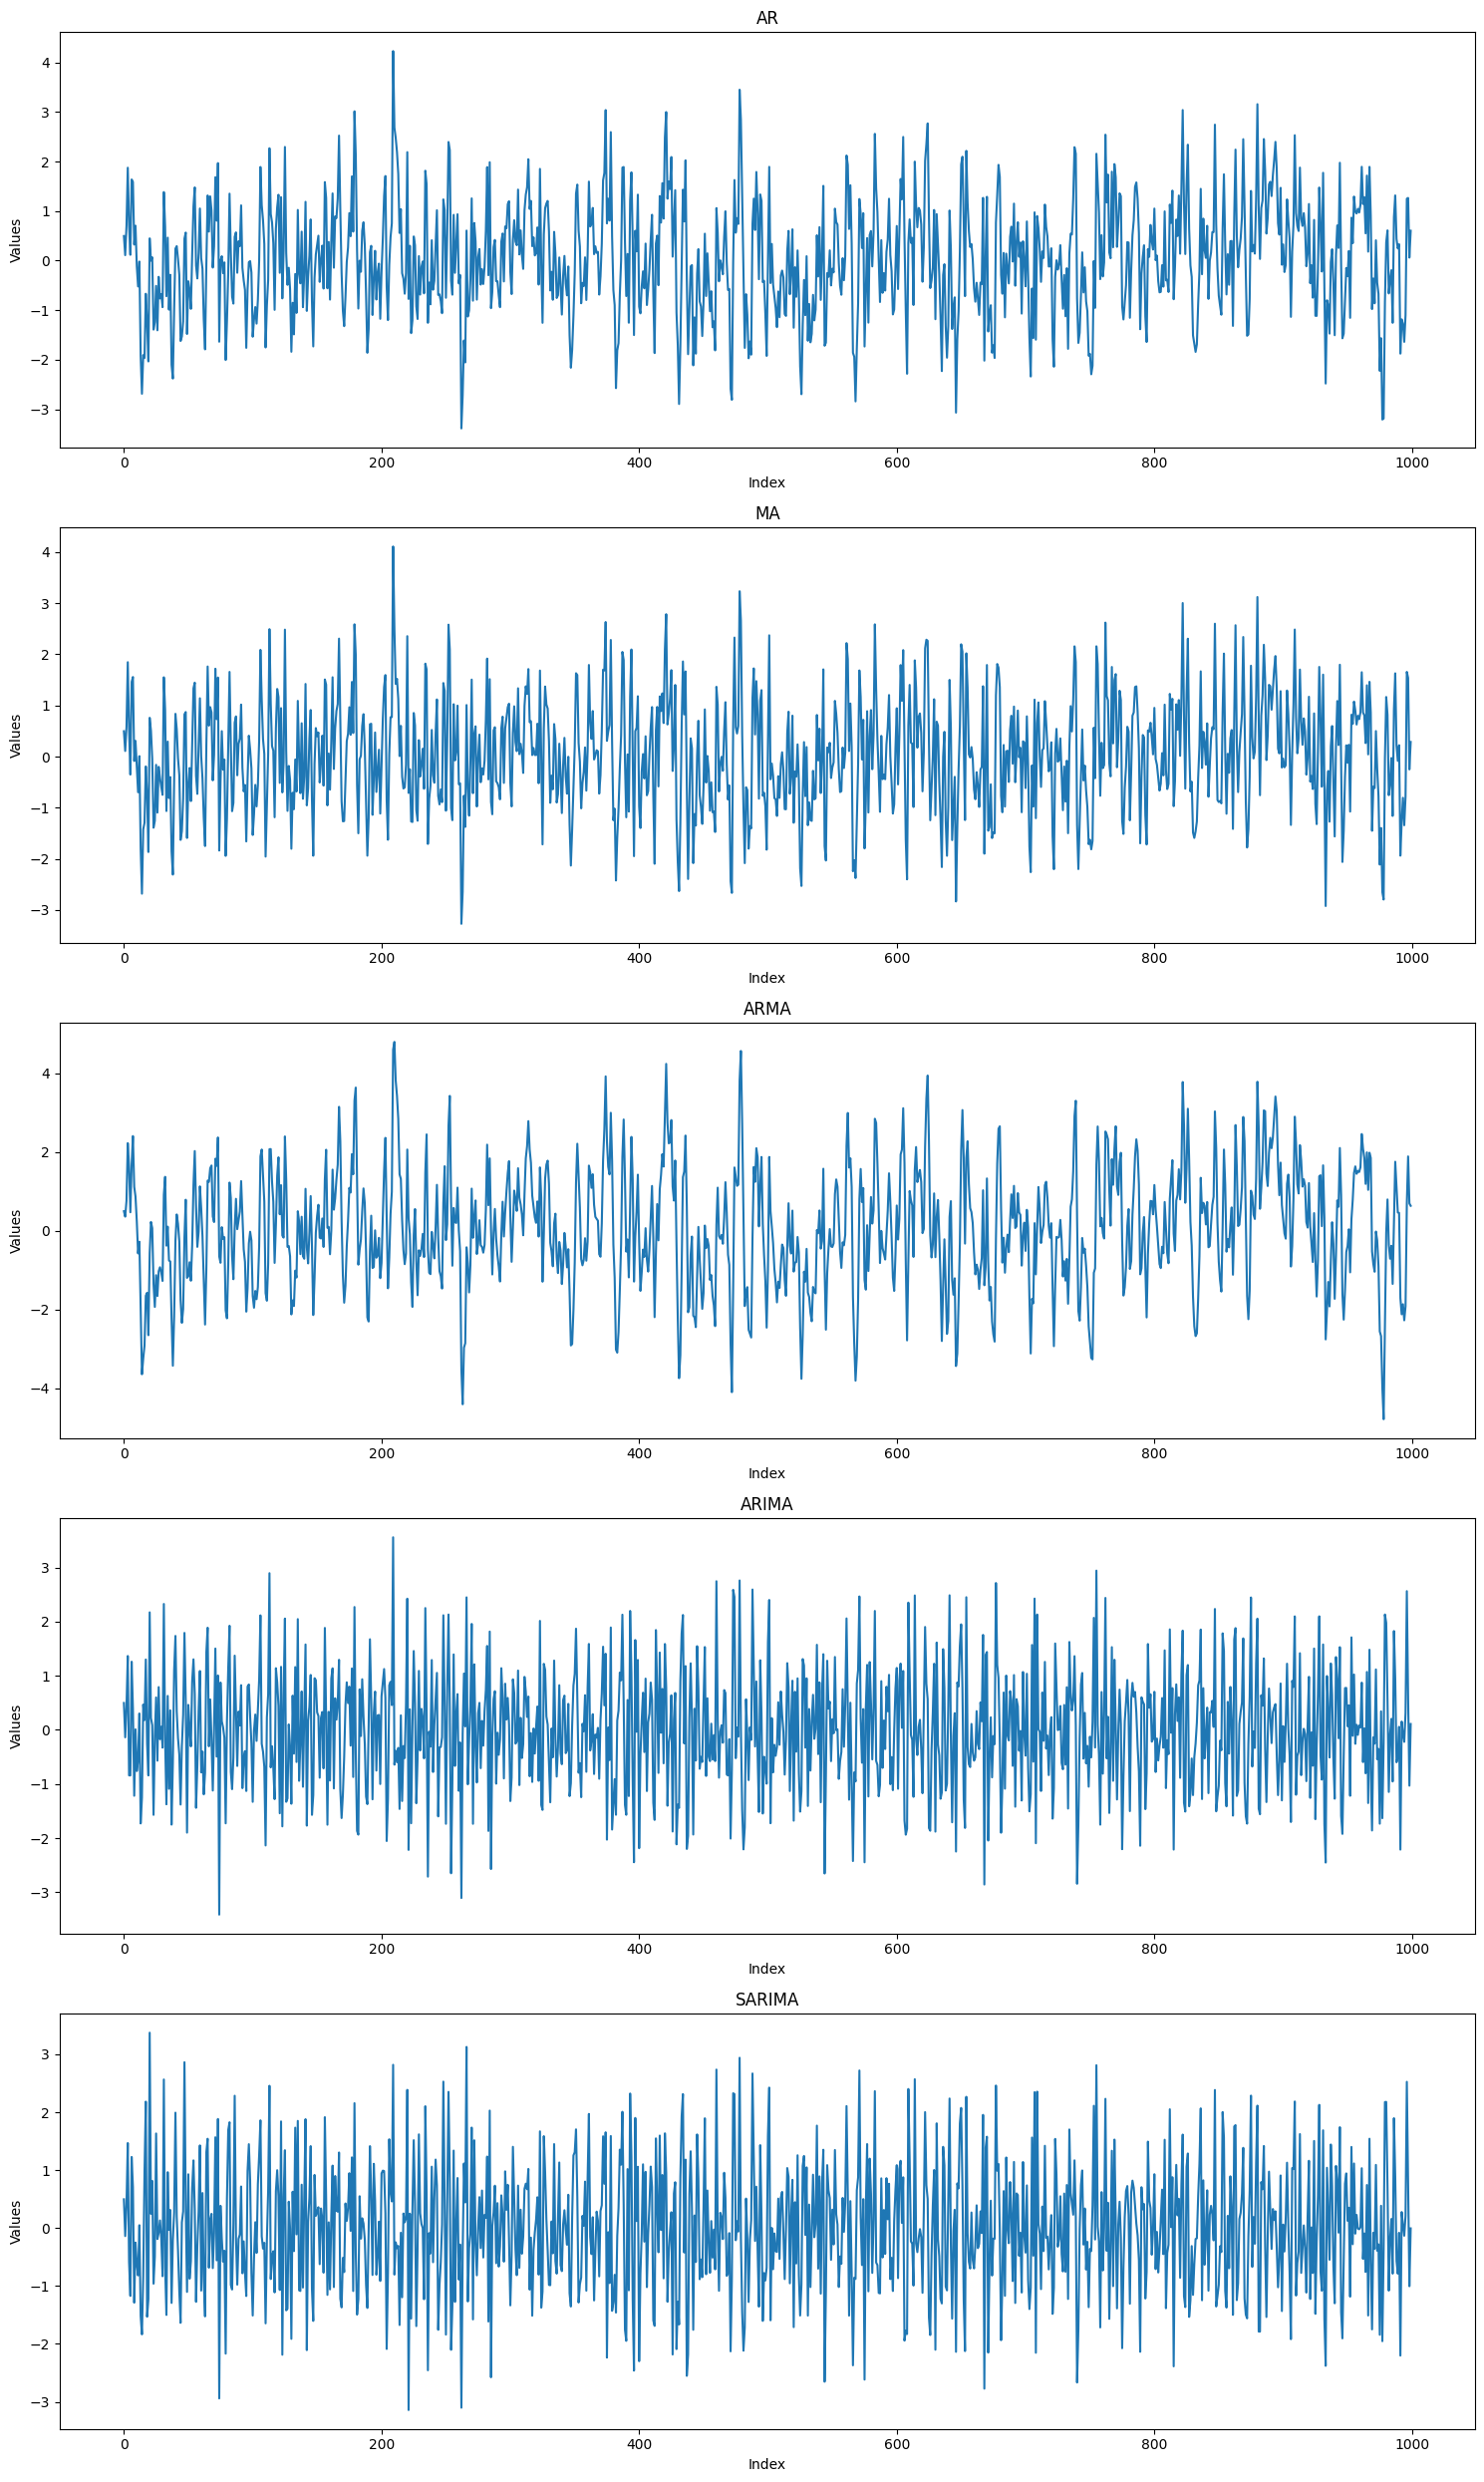

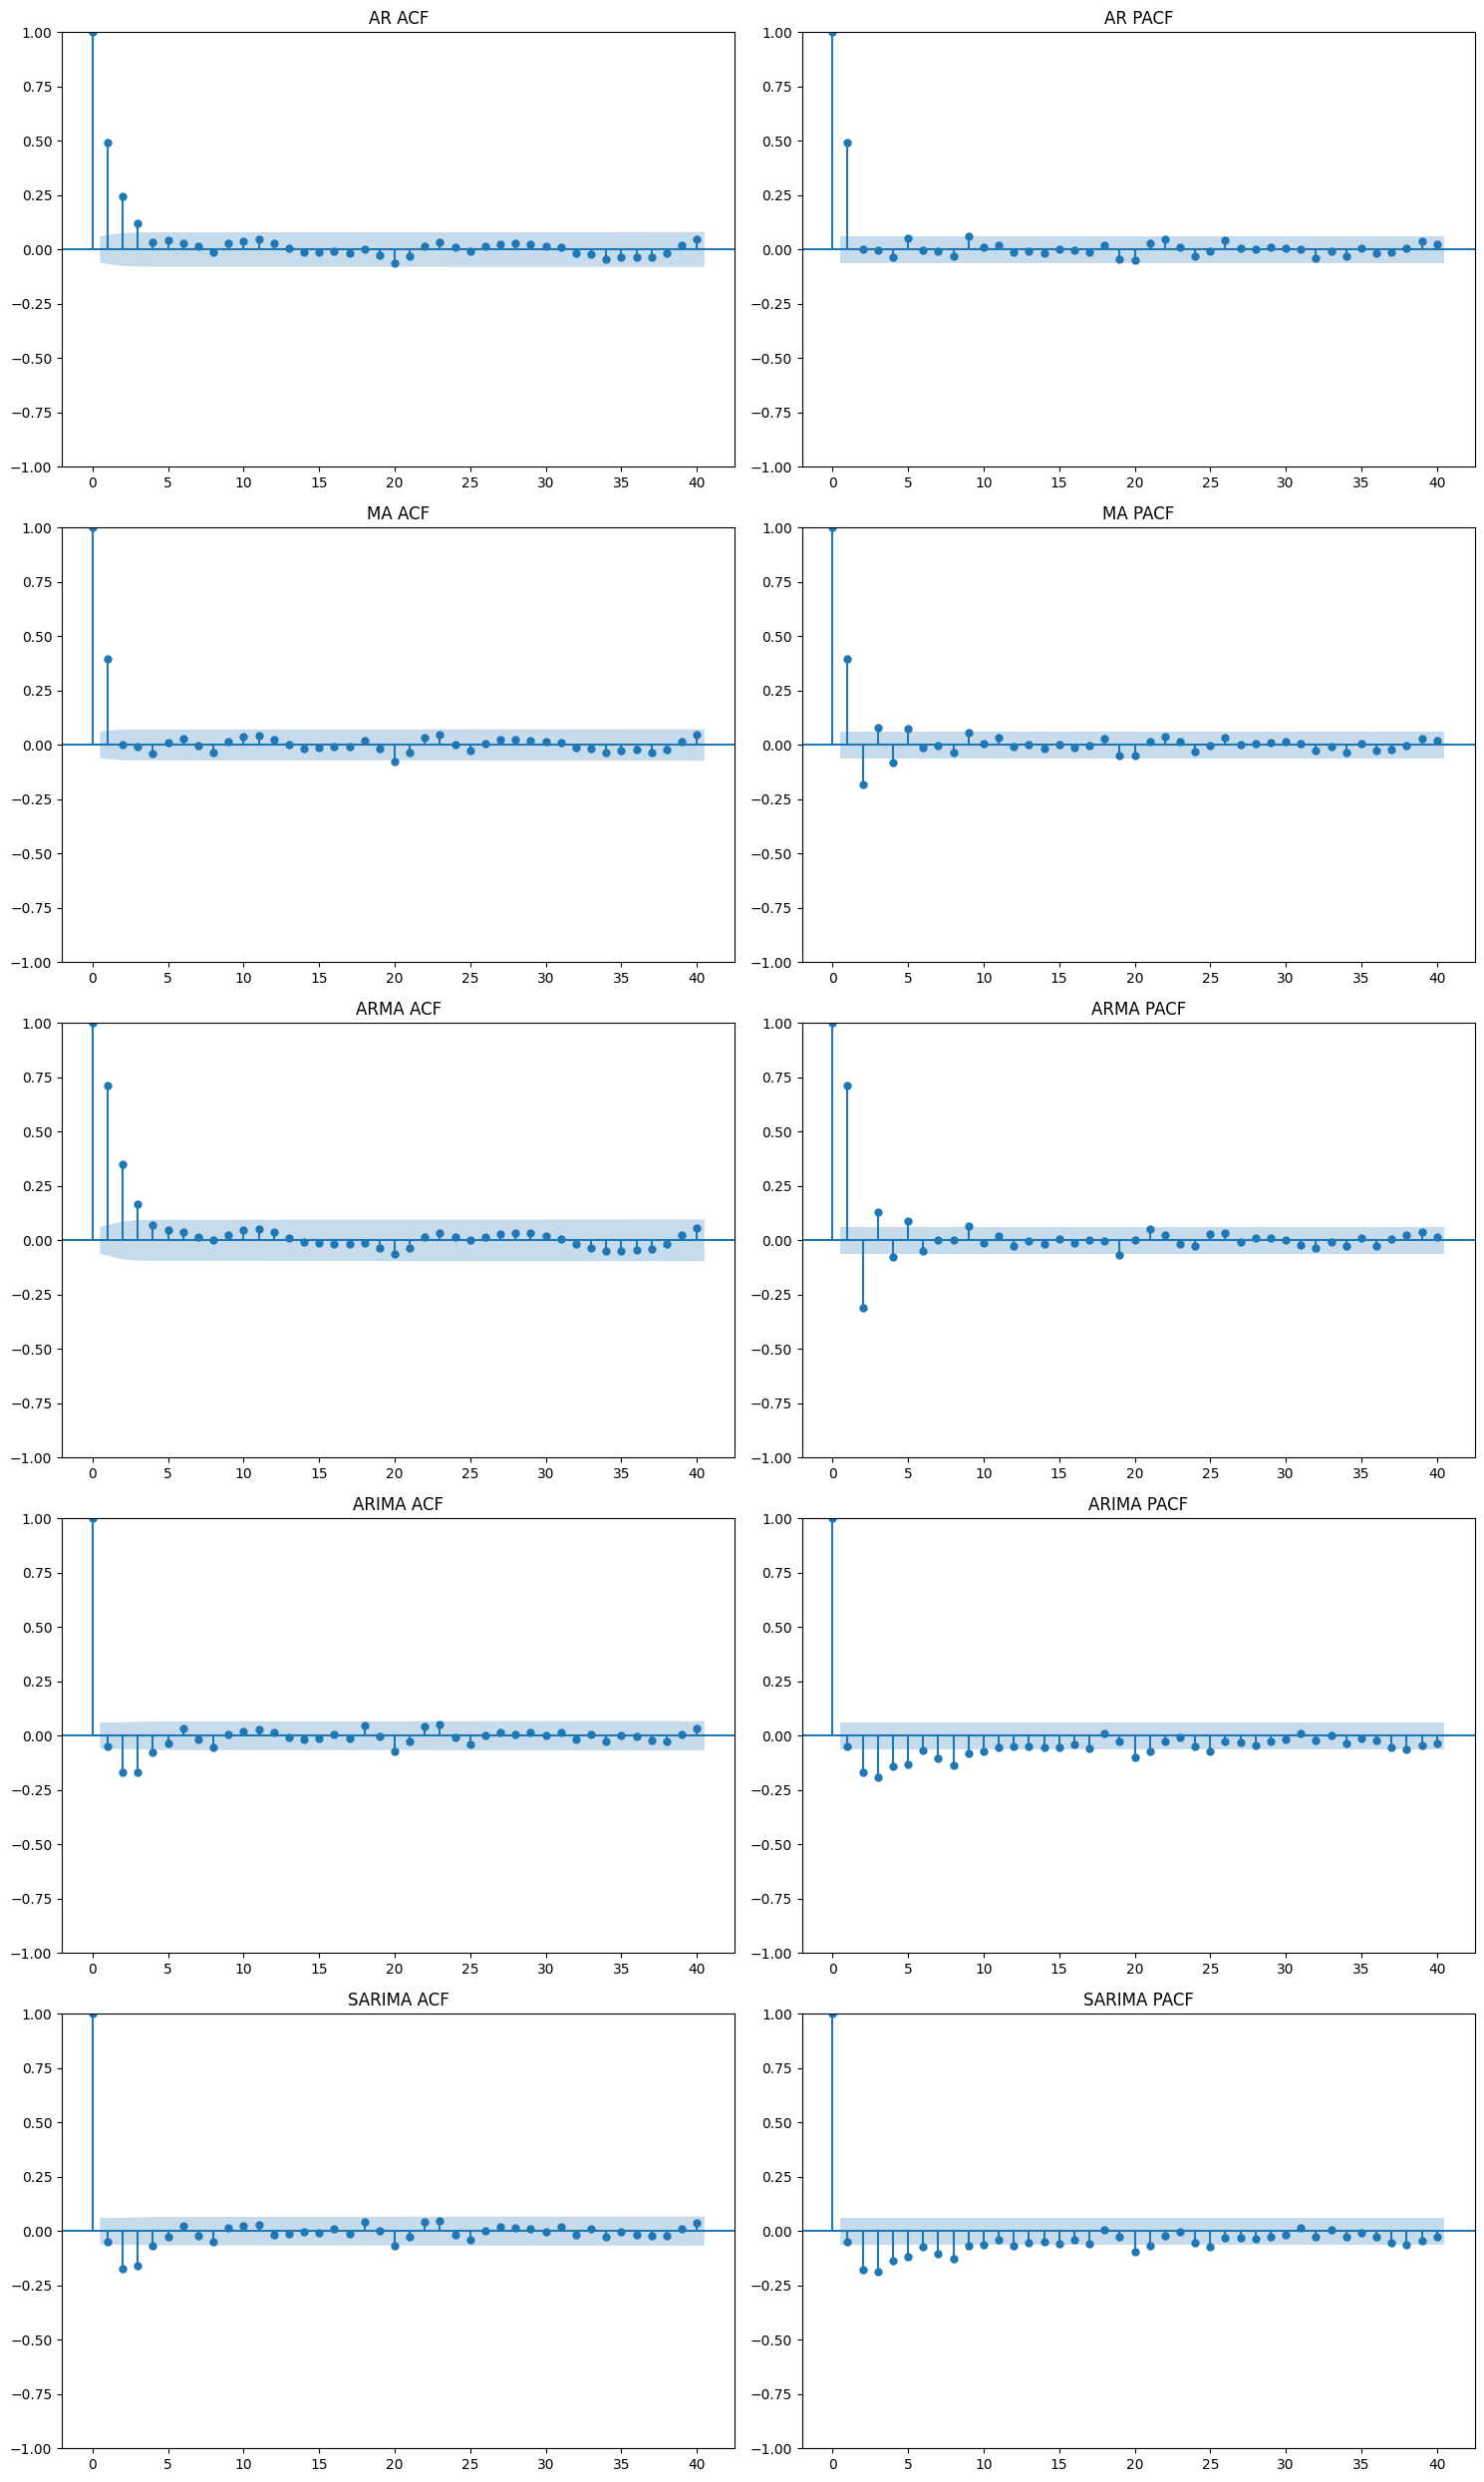

In [14]:
# Celda 1: Importaciones
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Celda 2: Funciones de simulación corregidas
def simulate_ar(ar_params, nsample=1000):
    np.random.seed(42)
    ar_params = np.atleast_1d(ar_params)
    ar = np.r_[1, -ar_params]  # prepend 1 and negate AR parameters
    ma = np.array([1])
    ar_process = ArmaProcess(ar, ma)
    return ar_process.generate_sample(nsample=nsample)

def simulate_ma(ma_params, nsample=1000):
    np.random.seed(42)
    ma_params = np.atleast_1d(ma_params)
    ar = np.array([1])
    ma = np.r_[1, ma_params]  # prepend 1 to MA parameters
    ma_process = ArmaProcess(ar, ma)
    return ma_process.generate_sample(nsample=nsample)

def simulate_arma(ar_params, ma_params, nsample=1000):
    np.random.seed(42)
    ar_params = np.atleast_1d(ar_params)
    ma_params = np.atleast_1d(ma_params)
    ar = np.r_[1, -ar_params]  # prepend 1 and negate AR parameters
    ma = np.r_[1, ma_params]  # prepend 1 to MA parameters
    arma_process = ArmaProcess(ar, ma)
    return arma_process.generate_sample(nsample=nsample)

def simulate_arima(data, order):
    arima_process = ARIMA(data, order=order)
    return arima_process.fit().resid

def simulate_sarima(data, order, seasonal_order):
    sarima_process = ARIMA(data, order=order, seasonal_order=seasonal_order)
    return sarima_process.fit().resid

# Celda 3: Funciones de visualización (sin cambios)
def plot_time_series(data_list, titles):
    fig, axes = plt.subplots(len(data_list), 1, figsize=(15, 5*len(data_list)))
    for i, (data, title) in enumerate(zip(data_list, titles)):
        axes[i].plot(data)
        axes[i].set_title(title)
        axes[i].set_ylabel('Values')
        axes[i].set_xlabel('Index')
    plt.tight_layout()
    plt.show()

def plot_acf_pacf(data_list, titles):
    fig, axes = plt.subplots(len(data_list), 2, figsize=(15, 5*len(data_list)))
    for i, (data, title) in enumerate(zip(data_list, titles)):
        plot_acf(data, lags=40, ax=axes[i, 0])
        plot_pacf(data, lags=40, ax=axes[i, 1])
        axes[i, 0].set_title(f'{title} ACF')
        axes[i, 1].set_title(f'{title} PACF')
    plt.tight_layout()
    plt.show()

# Celda 4: Simulación de procesos
ar_simulated = simulate_ar(0.5)  # Ahora puedes pasar un solo número o una lista
ma_simulated = simulate_ma(0.5)
arma_simulated = simulate_arma([0.5], [0.5])
arima_simulated = simulate_arima(arma_simulated, order=(1, 1, 1))
sarima_simulated = simulate_sarima(arma_simulated, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Celda 5: Visualización de series temporales
plot_time_series([ar_simulated, ma_simulated, arma_simulated, arima_simulated, sarima_simulated],
                 ['AR', 'MA', 'ARMA', 'ARIMA', 'SARIMA'])

# Celda 6: Visualización de ACF y PACF
plot_acf_pacf([ar_simulated, ma_simulated, arma_simulated, arima_simulated, sarima_simulated],
              ['AR', 'MA', 'ARMA', 'ARIMA', 'SARIMA'])